**Agrupamento - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 31/10/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. **Software**

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.12.0 64-bit.

2. **Hardware**

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 1TB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Instalação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a instalação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.



---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [2]:
import numpy as np  # Manipulação de listas
import pandas as pd  # Manipulação de tabelas
import seaborn as sbn  # Geração de gráficos estatísticos
import plotly.express as px  # Outro para geração de gráficos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl  # Biblioteca para pré-processamento
from copy import copy as cp  # Possibilitar copiar os objetos

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings

warnings.filterwarnings("ignore")

---


# **Conjunto de Dados: _Fashion MNIST_**


**Descrição do Dataset:** este conjunto é composto por **70 mil imagens** a respeito de **10 peças de roupas distintas**. Cada imagem possui a **resolução de 28x28 (784 pixels) em escala de cinza e 256 níveis de cinza**. Desse total, exitem **7000 imagens** para cada uma das peças de roupas, ou classes.

Cada classe pode ser vista a seguir.

1. Camiseta
2. Calça
3. Pulôver
4. Vestido
5. Casaco
6. Sandália
7. Camisa
8. Tênis
9. Bolsa
10. Bota de Tornozelo

Este conjunto de dados pode ser acessado por meio de: [Fashion MNIST](https://www.openml.org/search?type=data&status=active&id=40996)
(última data de acesso: 30 de out. de 2023).


## **Importação da Base de Dados**


Para importar as imagens, utiliza-se o módulo **scikit-learn** capaz de carregar diversas bases de dados através do portal **OpenML**, o qual essa base de dados está disponível online.


In [3]:
# Importação da função necessária para importação de base de dados OpenML
from sklearn.datasets import fetch_openml

# Carrega as imagens e suas classes separadamente
data, classes = fetch_openml(
    "Fashion-MNIST", return_X_y=True, as_frame=True, parser="auto"
)

# Conversão das imagens para NumPy
data = data.to_numpy()
classes = classes.to_numpy().astype(int)

# Criação de um dicionário com os rótulos das classes para fácil acesso
labels_desc = {
    0: "camiseta",
    1: "calca",
    2: "pulover",
    3: "vestido",
    4: "casaco",
    5: "sandalia",
    6: "camisa",
    7: "tenis",
    8: "bolsa",
    9: "bota",
}
labels_names = [
    "Camiseta",
    "Calça",
    "Pulôver",
    "Vestido",
    "Casaco",
    "Sandália",
    "Camisa",
    "Tênis",
    "Bolsa",
    "Bota de Tornozelo",
]

## **Pré-Processamento dos Dados**


### Exibição das Classes de Interesse

Abaixo, é possível visualizar uma amostra de cada classe, por meio do **matplotlib**.


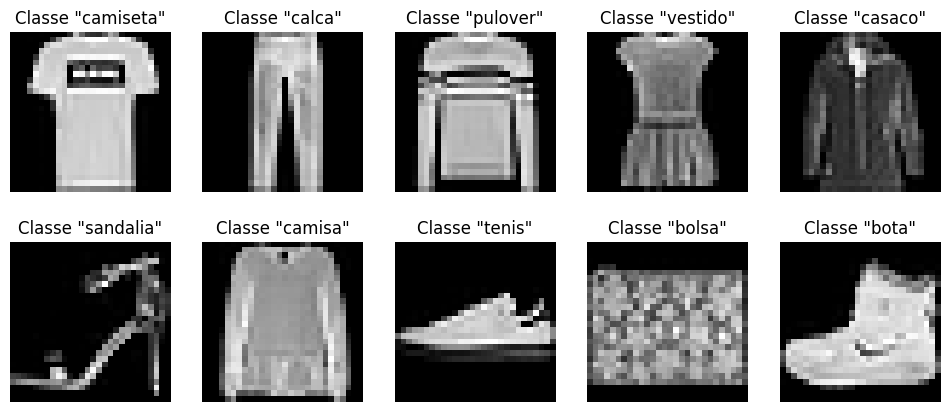

In [9]:
# Selecionando um índice de cada classe
idx_example_images = np.arange(10)

# Definindo o tamanho da figura
plt.figure(figsize=(12, 5))

# Definindo o número de linhas e colunas das subfiguras
fig_n_rows = 2
fig_n_cols = 5

# Mostrando as amostras de cada classe
for label, image_idx in enumerate(idx_example_images):
    plt.subplot(fig_n_rows, fig_n_cols, label + 1)
    plt.title(f'Classe "{labels_desc[label]}"')
    plt.imshow(data[classes == image_idx][0].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [10]:
# Verificando o número de dados faltantes a partir do NumPy
missing_image = np.isnan(data)
missing_image = np.sum(missing_image)
print("Número de Dados Perdidos: {0}".format(missing_image))

Número de Dados Perdidos: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Normalização dos Dados


Para normalizar os dados via _Standardization (Z-Score)_ deste **dataset**, basta aplicar as seguintes operações:


In [11]:
# Função responsável pela normalização via Z-Score
from sklearn.preprocessing import StandardScaler

# Mostrando os dados não normalizados
print("Dados Não Normalizados")
print("\tMédia: {0} | Desvio-Padrão: {1}".format(np.mean(data), np.std(data)))
print(data)


# Aplicando a Normalização com Z-Score
data = StandardScaler().fit_transform(data)
print("\n")

# Mostrando os dados normalizados
print("Dados Normalizados com Z-Score")
print("\tMédia: {0} | Desvio-Padrão: {1}".format(np.mean(data), np.std(data)))
print(data)

Dados Não Normalizados
	Média: 72.96981142492712 | Desvio-Padrão: 90.00009426846664
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Dados Normalizados com Z-Score
	Média: -5.591510409852669e-18 | Desvio-Padrão: 1.0
[[-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 ...
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]]


---


## **Agrupamento**


Texto


### _K-Means_


Texto


### _Hierarchical Clustering_


Texto


### _DBSCAN_


Texto


---
